# Testing LRCT

## What to Test:
    - We want to test LRCT on the following:
        - Single linear split
        - "Checkerboard" classification
        - Single nonlinear split
        - Set of nonlinear splits
        - Iris dataset
        - Cancer dataset

## How to Test (if "real-world" problem):
    - Set of parameters
    - GridSearchCV over the parameter set
    - Test against CART as well

In [13]:
from LRCT import LRCTree
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline
sns.set_style('darkgrid')

## Single Linear Split

In this section, we will test how LRCT performs at identifying a single linear split across 2 and 3 variables, both with additional variables as noise and without.  In addition, we will test adding noise to the data and leaving it out

### Across 2 Variables, no Additional Variables, no Noise

In [2]:
#Generate the fake data
np.random.seed(5648)
two_var_x = np.random.random((1000, 2))
two_var_x[:, 0] = two_var_x[:, 0] * 14
two_var_x[:, 1] = two_var_x[:, 1] * 8

df = pd.DataFrame(two_var_x, columns = ['col_0', 'col_1'])
target = df.apply(lambda row : 1 if row.col_1 > -1*row.col_0 + 10 else 0, axis = 1)
display(df.head())
display(target.value_counts())

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.4, random_state = 21)
display(y_test.value_counts())

,col_0,col_1
0,0.526561,4.588875
1,7.399726,6.490421
2,13.494321,4.578247
3,4.035185,7.820860
4,7.371973,5.895390


1    575
0    425
dtype: int64

1    234
0    166
dtype: int64

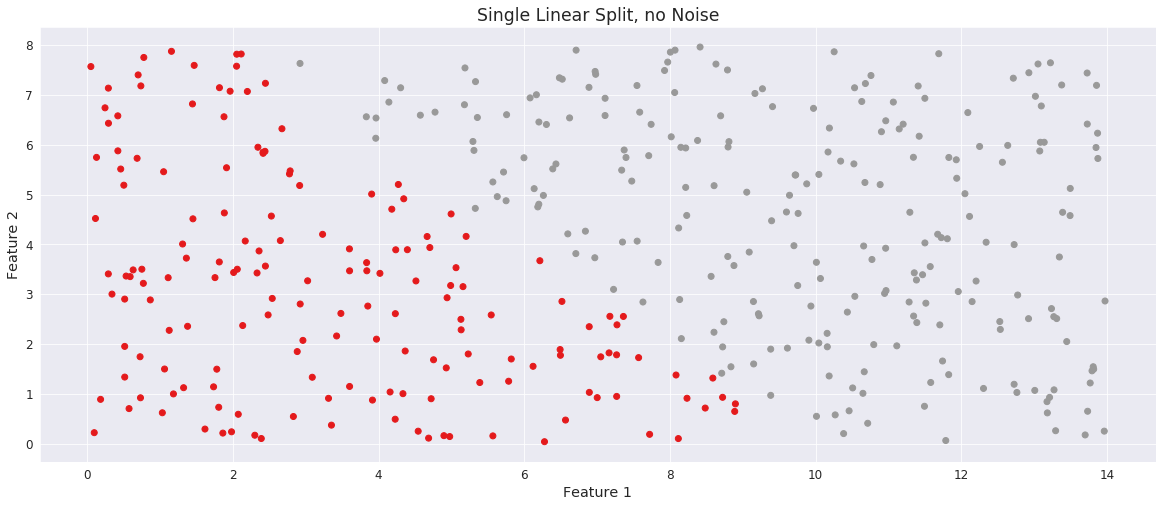

In [3]:
plt.figure(figsize = (20, 8))
plt.scatter(x_test.col_0, x_test.col_1, c = y_test, cmap = 'Set1')
plt.title('Single Linear Split, no Noise', fontsize = 'xx-large')
plt.xlabel('Feature 1', fontsize = 'x-large')
plt.ylabel('Feature 2', fontsize = 'x-large')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.show()

In [4]:
lrct = LRCTree(max_depth = 1).fit(x_train, y_train)
print('LRCT Decision Tree Structure:')
lrct.describe()
print('\n')
print(f'LRCT Accuracy Score: {lrct.score(x_test, y_test)}')

cart = DecisionTreeClassifier(max_depth = 1).fit(x_test, y_test)
print(f'CART Score: {cart.score(x_test, y_test)}')

LRCT Decision Tree Structure:
ID: 0, Parent ID: None, Depth: 0, Split: ('-0.8784715626859682*col_0 - col_1', -9.334081678707484)
-ID: 1, Parent ID: 0, Depth: 1, Split: nan
-ID: 2, Parent ID: 0, Depth: 1, Split: nan


LRCT Accuracy Score: 0.9775
CART Score: 0.8925


### Across 2 Variables, Additional Variables, no Noise

In [5]:
#Generate the fake data
np.random.seed(5648)
two_var_x = np.random.random((1000, 10))
two_var_x[:, 0] = two_var_x[:, 0] * 14
two_var_x[:, 1] = two_var_x[:, 1] * 8

df = pd.DataFrame(two_var_x, columns = [f'col_{i}' for i in range(10)])
target = df.apply(lambda row : 1 if row.col_1 > -1*row.col_0 + 2*row.col_6 + 10 else 0, axis = 1)
display(df.head())
display(target.value_counts())

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.4, random_state = 21)
display(y_test.value_counts())

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
0,0.526561,4.588875,0.528552,0.811303,0.963880,0.572281,0.288227,0.977607,0.526570,0.736924
1,5.637130,3.412889,0.989832,0.899133,0.498617,0.598368,0.704547,0.972985,0.275137,0.345230
2,0.714066,3.811455,0.694902,0.179677,0.943785,0.116094,0.895479,0.286599,0.171343,0.288328
3,13.720477,7.976714,0.763154,0.903692,0.830631,0.698605,0.352079,0.190098,0.697168,0.577805
4,7.769528,4.866656,0.703745,0.288501,0.440483,0.875562,0.765414,0.051112,0.067182,0.655207


1    505
0    495
dtype: int64

0    202
1    198
dtype: int64

In [6]:
lrct = LRCTree(max_depth = 1, n_independent = 2).fit(x_train, y_train)
print('LRCT Decision Tree Structure:')
lrct.describe()
print('\n')
print(f'LRCT Accuracy Score: {lrct.score(x_test, y_test)}')

cart = DecisionTreeClassifier(max_depth = 1).fit(x_test, y_test)
print(f'CART Score: {cart.score(x_test, y_test)}')

LRCT Decision Tree Structure:
ID: 0, Parent ID: None, Depth: 0, Split: ('0.2185577102905232*col_0 + 0.21714806362032943*col_1 - col_6', 1.7681742047149691)
-ID: 1, Parent ID: 0, Depth: 1, Split: nan
-ID: 2, Parent ID: 0, Depth: 1, Split: nan


LRCT Accuracy Score: 0.96
CART Score: 0.865


### TODO
- Checkerboard
- Two variables, noise, w+w/o nonlinear
- Multiple variables, noise, w+w/o nonlinear
- Other datasets

### Iris Dataset

I'm including the following to show how LRCT is mostly (if not fully) developed into a scikit-learn classifier.  Two big things for scikit-learn classifiers are:

1. Use in scikit-learn GridSearchCV objects
2. Integration into scikit-learn Pipeline objects

The following will show these features on the well-known Breast Cancer dataset

In [7]:
cancer_data = load_breast_cancer()
x = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])
y = pd.Series(cancer_data['target'])
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
122,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.201200,0.2655,0.06877,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.5803,0.22480,0.3222,0.08009
254,19.45,19.33,126.50,1169.0,0.10350,0.11880,0.13790,0.085910,0.1776,0.05647,...,25.70,24.57,163.10,1972.0,0.14970,0.31610,0.4317,0.19990,0.3379,0.08950
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.027390,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
231,11.32,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,0.1869,0.05628,...,12.08,33.75,79.82,452.3,0.09203,0.14320,0.1089,0.02083,0.2849,0.07087
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905


In [11]:
# Let's start with the GridSearchCV object
lrct_params = {
    'max_depth' : range(1, 5),
    'min_samples_split' : range(2, 4),
    'n_independent' : range(1, 3),
    'highest_degree' : range(1, 3),
    'method' : ['ols', 'ridge', 'lasso']
}

cart_params = {
    'max_depth' : range(1, 5),
    'min_samples_split' : range(2, 11)
}

lrct_searcher = GridSearchCV(LRCTree(), lrct_params, n_jobs = 10, iid = True, cv = 2, verbose = 2).fit(x_train, y_train)
cart_searcher = GridSearchCV(DecisionTreeClassifier(), cart_params, n_jobs = 10, iid = True, cv = 2, verbose = 2).fit(x_train, y_train)

print(f'LRCT Best Parameters: {lrct_searcher.best_params_}')
print(f'CART Best Parameters: {cart_searcher.best_params_}')
print(f'LRCT Test Accuracy: {lrct_searcher.score(x_test, y_test)}')
print(f'CART Test Accuracy: {cart_searcher.score(x_test, y_test)}')

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed: 27.0min
[Parallel(n_jobs=10)]: Done 192 out of 192 | elapsed: 42.2min finished


Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done  53 out of  72 | elapsed:    1.5s remaining:    0.5s


LRCT
LRCT Best Parameters: {'highest_degree': 1, 'max_depth': 2, 'method': 'ridge', 'min_samples_split': 2, 'n_independent': 2}
CART Best Parameters: {'max_depth': 3, 'min_samples_split': 9}
LRCT Test Accuracy: 0.951048951048951
CART Test Accuracy: 0.9230769230769231


[Parallel(n_jobs=10)]: Done  72 out of  72 | elapsed:    1.6s finished


In [14]:
# Now for pipeline
steps = [
    ('scaler', MinMaxScaler()),
    ('dataframer', FunctionTransformer(lambda x : pd.DataFrame(x, columns = cancer_data['feature_names']))),
    ('clf', LRCTree(highest_degree = 1, max_depth = 2, method = 'ridge', min_samples_split = 2, n_independent = 2))
]

pipeline = Pipeline(steps).fit(x_train, y_train)
print(f'Accuracy: {pipeline.score(x_test, y_test)}')

/home/jwrenn4/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/home/jwrenn4/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Accuracy: 0.9440559440559441


/home/jwrenn4/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
